In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('dataset_bascula.csv')

In [4]:
data = dataset.drop(columns=['Mes', 'fecha', 'Grupo', 'Hora', 'Brix jugo', 'Pureza jugo', '% AR jugo', 'Glucobrix',
                      'Acidez', '% Jugo', 'Brix caña', 'Pol caña', 'Pza. caña', 'Calidad Caña', 'Humedad caña',
                      'ENVIO'])

## Exploración de Datos 

In [97]:
data.head()

,Semana,Estrato,Pol jugo,Rdto. Pol Bascula,% Fibra caña,Variedad
0,1,BAJO,13.76,114.45,13.15,CP 731547
1,1,BAJO,13.87,110.94,14.39,CP 731547
2,1,BAJO,13.63,116.06,12.38,CP 731547
3,1,BAJO,14.72,122.48,13.14,CP 731547
4,1,BAJO,15.38,128.44,13.02,CP 731547


In [98]:
data.count()

Semana               24030
Estrato              23830
Pol jugo             24030
Rdto. Pol Bascula    24030
% Fibra caña         24030
Variedad             24030
dtype: int64

In [5]:
data.Estrato.isna().sum()

200

In [100]:
(200/24030)*100

0.8322929671244279

Hay un total de 24030 en la mayoría de columnas excepto en la de estrato donde hay un total de 200 datos menos. Estos datos representan menos del 1% de los datos de todo el dataset, por lo que se eliminaran los de datos estas filas, ya que representan una parte muy pequeña del dataset.

In [6]:
data = data.dropna()

In [102]:
data.count()

Semana               23830
Estrato              23830
Pol jugo             23830
Rdto. Pol Bascula    23830
% Fibra caña         23830
Variedad             23830
dtype: int64

In [103]:
data.describe()

,Semana,Pol jugo,Rdto. Pol Bascula,% Fibra caña
count,23830.000000,23830.000000,23830.000000,23830.000000
mean,13.103861,14.158395,118.240634,13.344172
std,7.017750,1.647671,14.015970,1.269979
min,1.000000,4.520000,21.870000,9.650000
25%,7.000000,13.080000,109.130000,12.460000
50%,13.000000,14.180000,118.450000,13.210000
75%,19.000000,15.250000,127.620000,14.087500
max,25.000000,22.570000,174.370000,30.260000


In [104]:
data.dtypes

Semana                 int64
Estrato               object
Pol jugo             float64
Rdto. Pol Bascula    float64
% Fibra caña         float64
Variedad              object
dtype: object

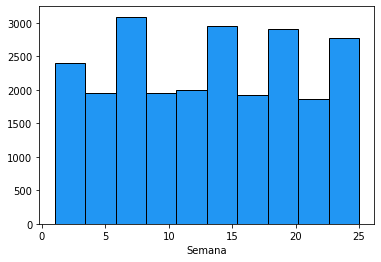

In [7]:
plt.hist(data['Semana'], color='#2196f3',ec='black')
plt.xlabel('Semana')
plt.show()

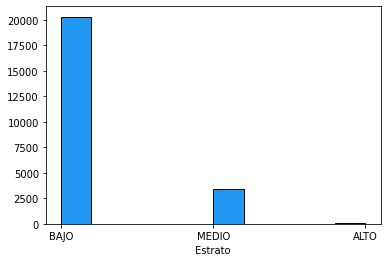

In [8]:
plt.hist(data['Estrato'], color='#2196f3',ec='black')
plt.xlabel('Estrato')
plt.show()

In [32]:
data['Variedad'].value_counts()

CP 722086      7574
CP 731547      3023
SP 716161      1737
VARIAS         1627
CG 02-163      1566
SP 791287      1388
CP 881165      1341
CG 9878         977
CG 9846         854
MEX 79-431      801
RB 732577       664
SP 83-2847      594
CG 9810         320
PR 67-1355      242
RB 845210       188
CG 00-033       183
CP 01-1341      136
PGM 89968       118
RB 84-5210      117
MEX 68P23       112
RB 732908        45
PR 87-2080       39
CP 931017        27
CP 021564        23
CP 892143        22
PR 752002        21
CG 01-53         20
CG 00-102        20
CG 9640          16
CP 01-1564       13
RB 721012         8
CG 03-025         5
CP 97-1931        4
SP 80-1842        3
CG 05-12517       2
Name: Variedad, dtype: int64

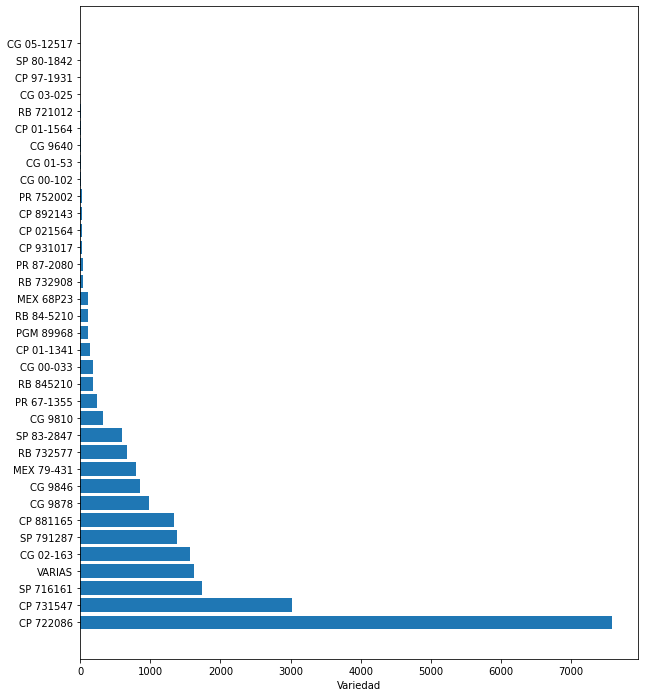

In [10]:
frequency = data['Variedad'].value_counts()
plt.figure(figsize=(10, 12))
plt.xlabel('Variedad')
plt.barh(frequency.index, width=frequency)
plt.show()

Gráfica de barras para mostrar la frecuencia de las distintas variedades.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(


<AxesSubplot:xlabel='Semana', ylabel='Pol jugo'>

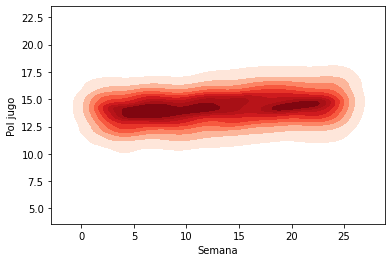

In [36]:
sns.kdeplot(data['Semana'], 
            data['Pol jugo'],
            color='r', shade=True, Label='pol',
            cmap="Reds", shade_lowest=False)

Esta gráfica nos ayuda a ver la distribución de probabilidad entre las variables de semana y la polarización del jugo

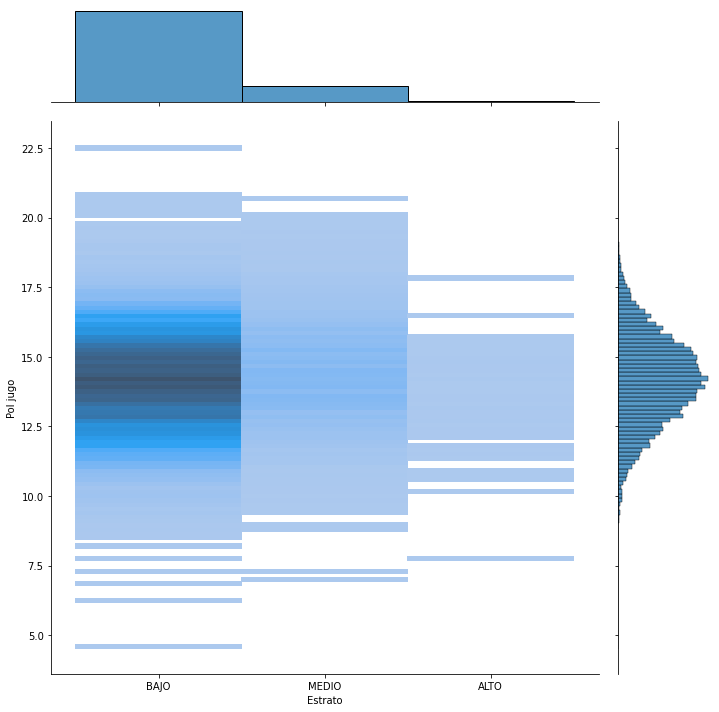

In [84]:
sns.jointplot(x='Estrato', y='Pol jugo', data=data, kind='hist', height=10)

En esta gráfica se puede ver la relación de cada uno de los estratos con la polarización del jugo, para ver como en donde que polarización se encuentran la mayoría de datos dependiendo del estrato.

<AxesSubplot:xlabel='Estrato', ylabel='Pol jugo'>

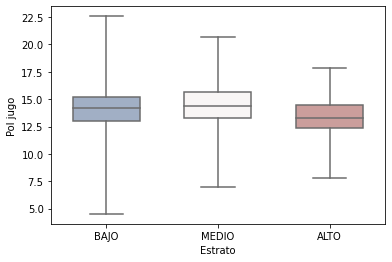

In [87]:
sns.boxplot(x="Estrato", y="Pol jugo", data=data,
            whis=[0, 100], width=.6, palette="vlag")

Aquí se puede ver la concentración de los datos para cada estrato en relación a su polarización de jugo, para ver la media de cada estrato.

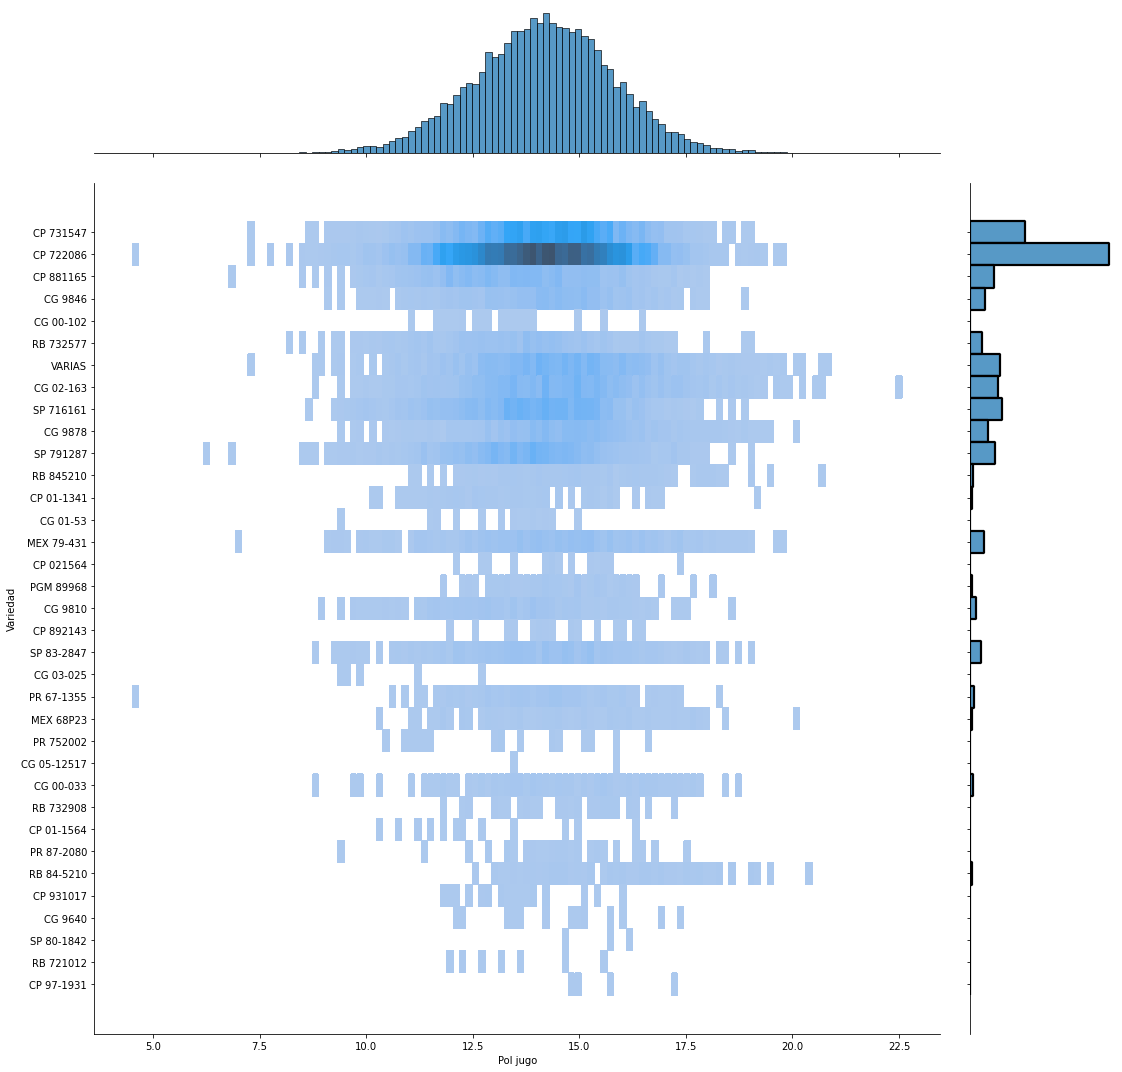

In [24]:
sns.jointplot(x='Pol jugo', y='Variedad', data=data, height=15, kind='hist')

En esta gráfica se puede observar la polaricación del jugo con respecto de la variedad de la caña y ver como se distibuyeron todos los datos de polarización de jugo de cada variedad.

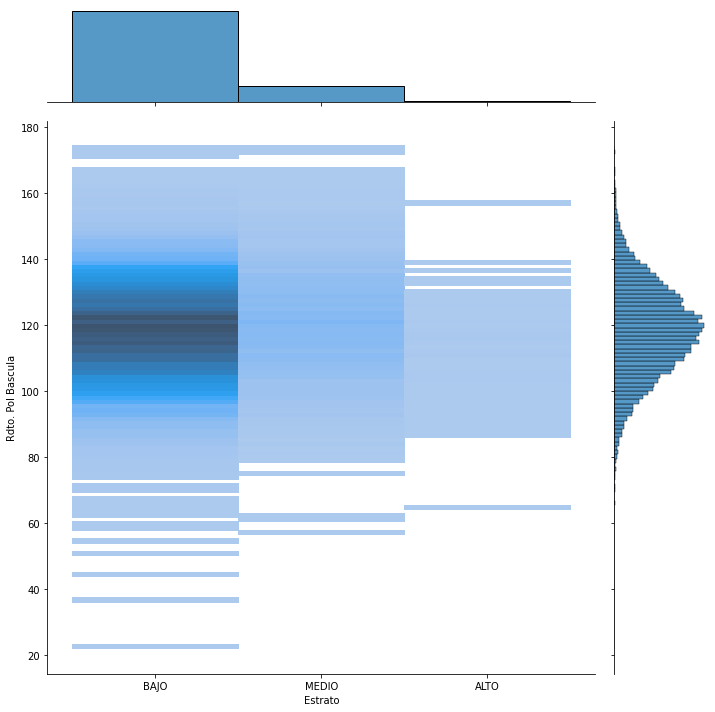

In [90]:
sns.jointplot(y='Rdto. Pol Bascula', x='Estrato', data=data, height=10, kind='hist')

La gráfica nos muestra la distribución de los datos de cada estrato con respecto del rendimiento.

<AxesSubplot:xlabel='Estrato', ylabel='Rdto. Pol Bascula'>

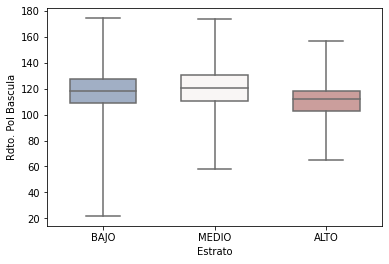

In [91]:
sns.boxplot(x="Estrato", y="Rdto. Pol Bascula", data=data,
            whis=[0, 100], width=.6, palette="vlag")

Aquí se puede ver la concentración de los datos de cada estrato con repecto del rendimiento.

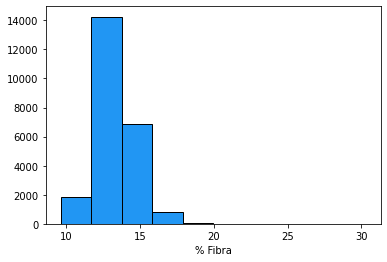

In [92]:
plt.hist(data['% Fibra caña'], color='#2196f3',ec='black')
plt.xlabel('% Fibra')
plt.show()

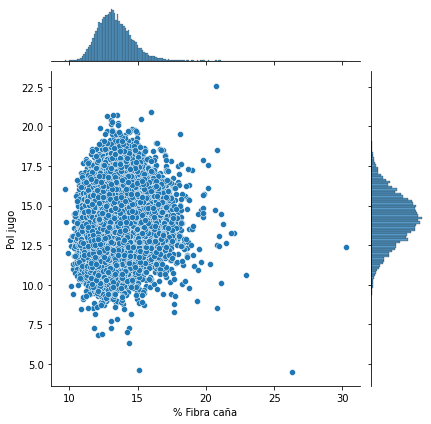

In [55]:
sns.jointplot(x='% Fibra caña', y='Pol jugo', data=data)

En esta gráfica podemos ver la distribución entre la polarización del jugo con el % de fibra de la caña.

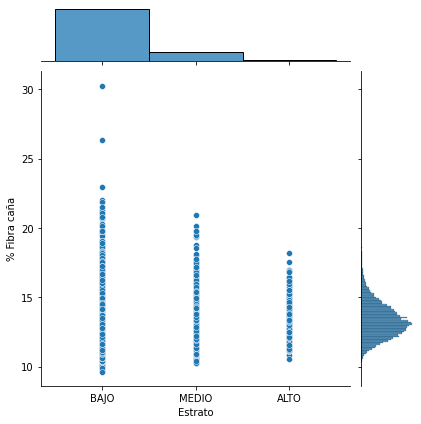

In [63]:
sns.jointplot(y='% Fibra caña', x='Estrato', data=data)

Aquí esta representada la distribución de los datos de los distintos estratos y el porcentaje de fibra.

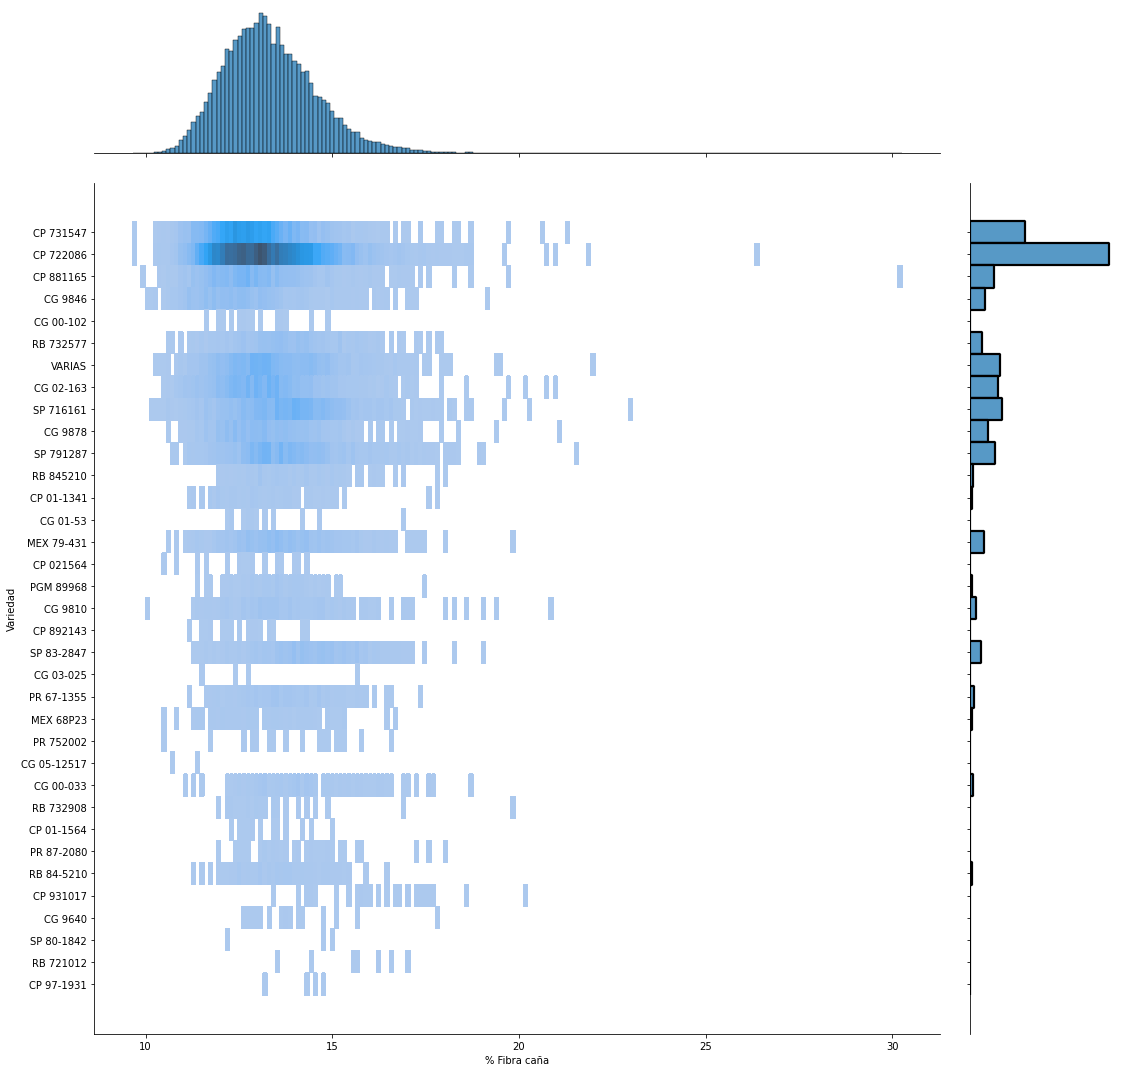

In [66]:
sns.jointplot(x='% Fibra caña', y='Variedad', data=data, height=15, kind='hist')

Esta gráfica nos muestra como los datos de cada variedad se distribuyeron dependiendo del porcentaje de fibra de la caña.

In [52]:
data.corr()

,Semana,Pol jugo,Rdto. Pol Bascula,% Fibra caña
Semana,1.000000,0.205991,0.066195,0.421770
Pol jugo,0.205991,1.000000,0.944153,0.102457
Rdto. Pol Bascula,0.066195,0.944153,1.000000,-0.217949
% Fibra caña,0.421770,0.102457,-0.217949,1.000000


Tabla de correlaciones entre las distintas variables numéricas

In [55]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

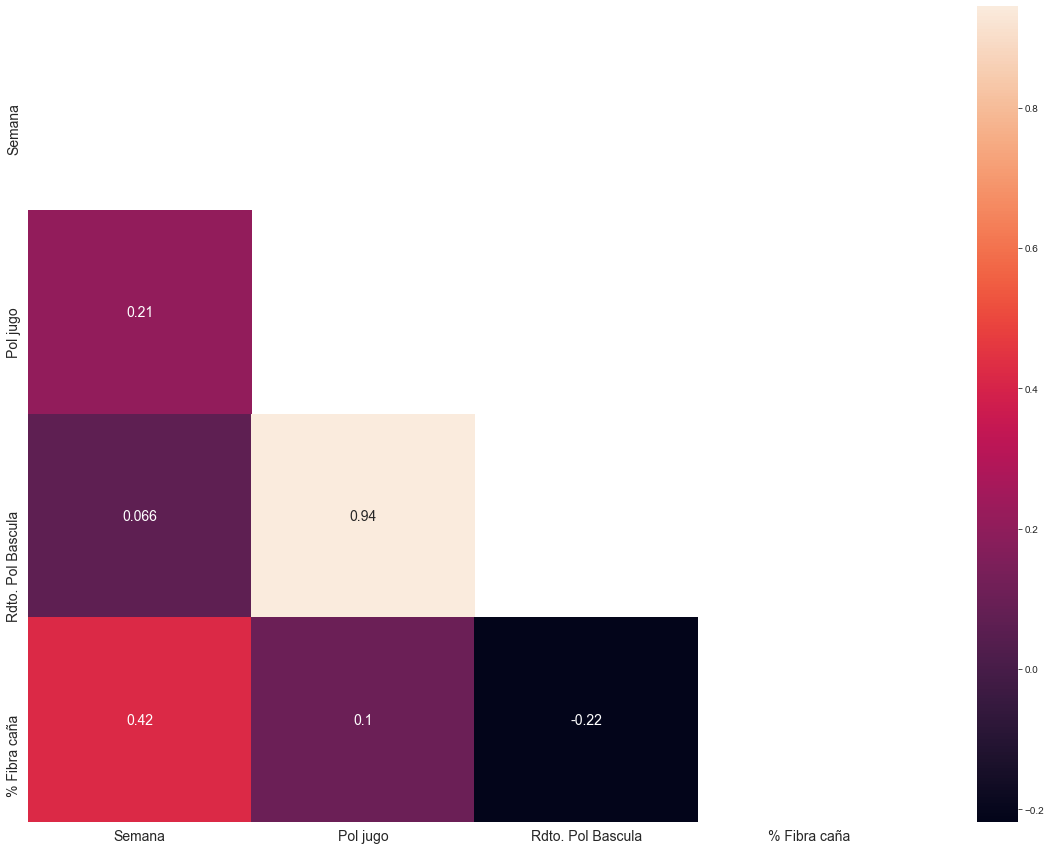

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Mapa de calor en donde se representan las correlaciones entre las distintas variables numéricas.